In [74]:
#import keras for building a simple regression model
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd




In [51]:
# input data looks like day of year and output data looks like energy generated that day
#load data from csv fiile into a numpy array using pandas and skipping the header row
data = pd.read_csv('Calcium_Classified.csv').values


In [52]:
#convert date time string '01/01/2020 07:54:00' to day of year 1-365
date_time_str = data[0,0]
date_time_obj = datetime.datetime.strptime(date_time_str, '%d/%m/%Y %H:%M:%S')
day_of_year = date_time_obj.timetuple().tm_yday
print(day_of_year)

1


In [53]:
#add a column to data frame with day of year
data = np.insert(data, 5, values=0, axis=1)
data = np.insert(data, 6, values=0, axis=1)
for i in range(data.shape[0]):
    date_time_str = data[i,0]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%m/%d/%Y %H:%M:%S')
    day_of_year = date_time_obj.timetuple().tm_yday
    year = date_time_obj.timetuple().tm_year
    data[i,5] = day_of_year
    data[i,6] = year

In [54]:
#create a dataframe with the colums at index 1 and 5 of dataframe data
df = data[:,[1, 5, 6]]

In [55]:
df_pd = pd.DataFrame(df)

In [64]:
#select the max value of column 0 in each group
m_df_pd = df_pd.groupby([2, 1]).max()
m_df_pd = m_df_pd.reset_index()


In [65]:
values = m_df_pd.values

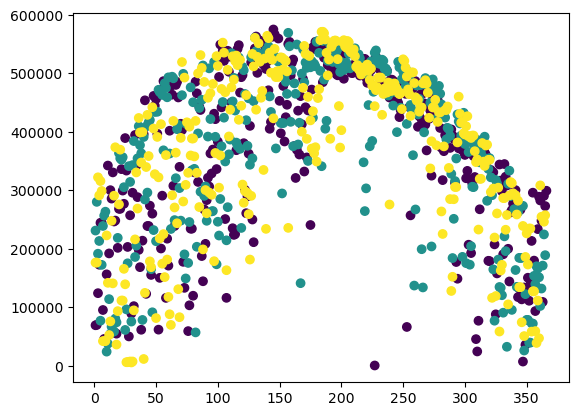

In [70]:
day = values[:,1]
energy = values[:,2]
year = values[:,0]

#plot energy against day of year and color by year and add labels for each year
plt.scatter(day, energy, c=year)
plt.show()


In [79]:
#build a model
model = Sequential()
model.add(Dense(1024, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
#compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#train the model
model.fit(values[:,0:2], energy, epochs=500)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1024)              3072      
                                                                 
 dropout_20 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 128)              

ValueError: in user code:

    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Shehroze\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_33" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


34/34 [==============================] - 0s 1ms/step


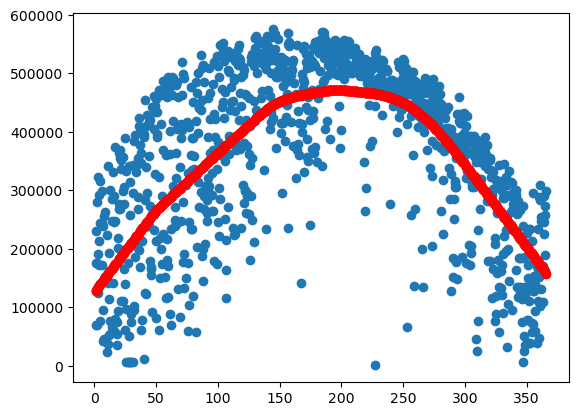

In [83]:
#predict
y_pred = model.predict(values[:,0:2])
#plot the results
plt.scatter(day, energy)
plt.scatter(day, y_pred, color='red')
plt.show()